### Data Cleaning

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


In [14]:
all_wine = pd.read_csv(r'C:\Users\janin\OneDrive\Desktop\Python exercise\Project 2\all_wine_with_dummies.csv', sep=',')

white_wine = all_wine[all_wine['type']==0]

### Correlation Maps

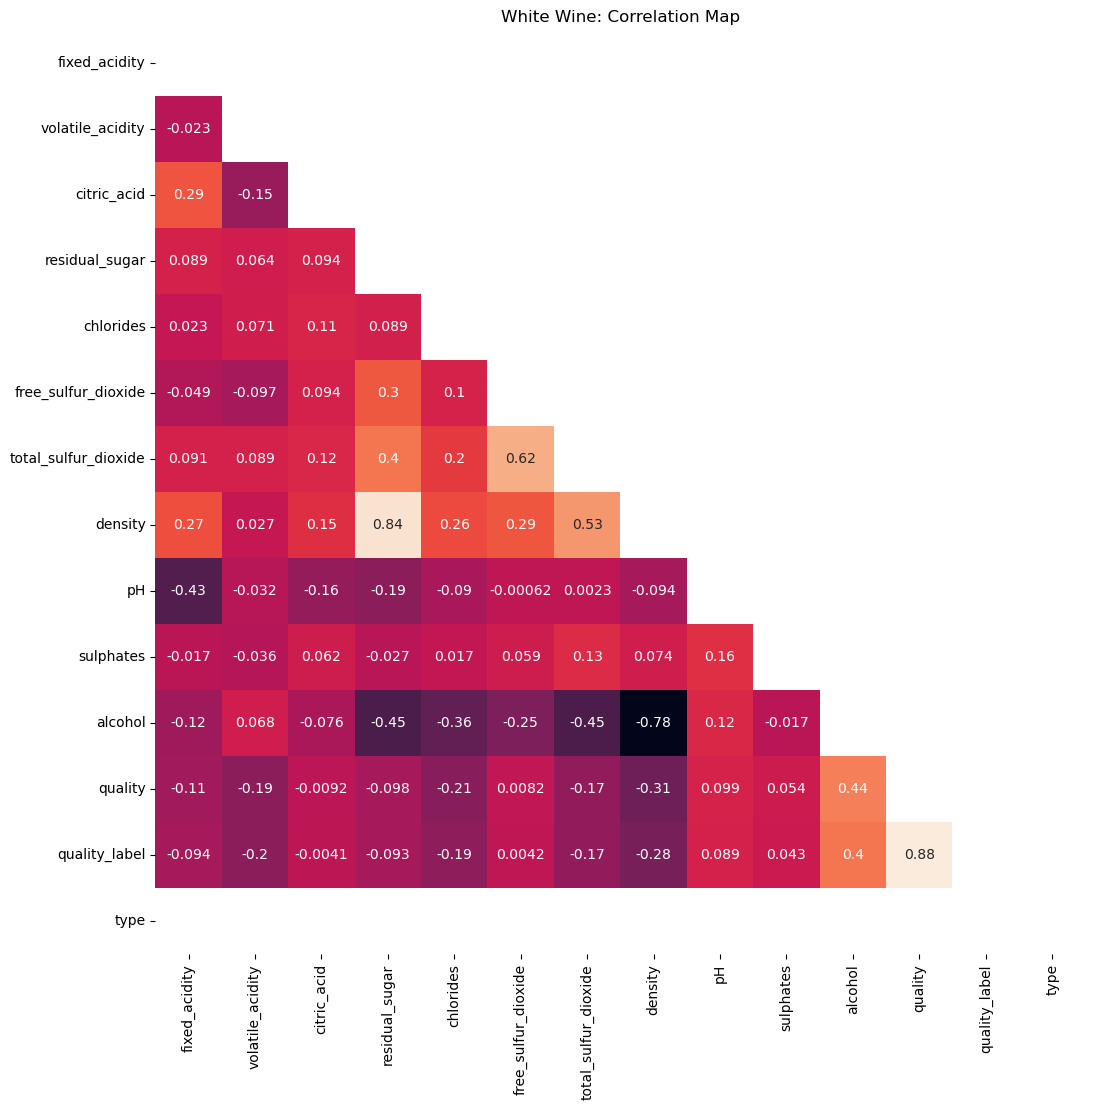

In [23]:
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(white_wine.corr()))
sns.heatmap(white_wine.corr(), annot=True, cbar=False, mask = mask).set_title('White Wine: Correlation Map')
plt.show()


#sns.heatmap(white_wine_corr, ax=axes[0], cmap="coolwarm", cbar=False, vmin=vmin, vmax=vmax, annot = True)
#axes[0].set_title('White Wine')

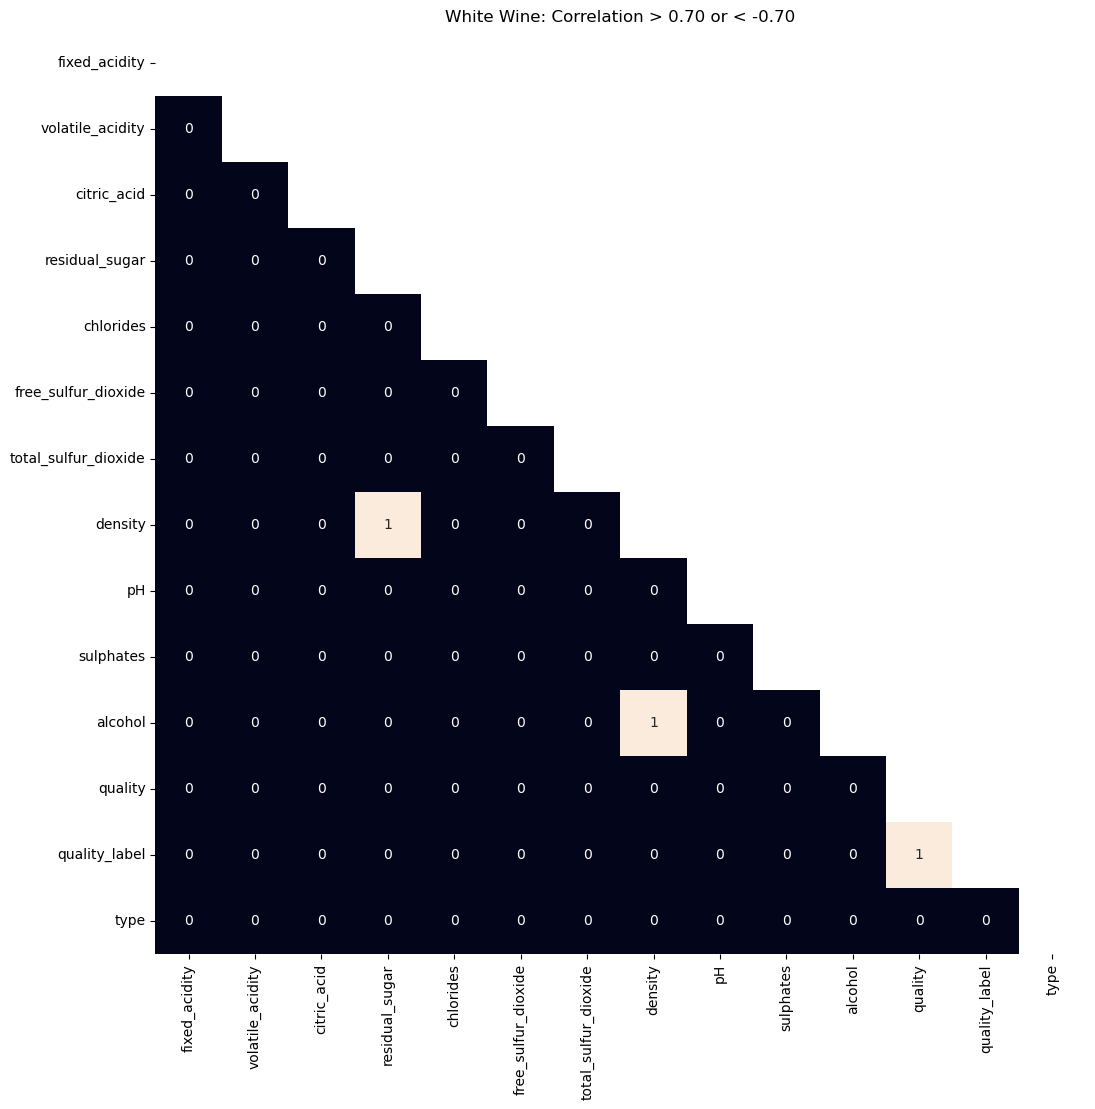

In [24]:
#Heatmap for Correlation > 0.7 or < -0.7
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(white_wine.corr(), dtype=bool))  # Upper triangular mask
correlation_matrix = white_wine.corr()
sns.heatmap((correlation_matrix > 0.7) | (correlation_matrix < -0.7), mask=mask, annot=True, cbar=False, fmt='.0f').set_title('White Wine: Correlation > 0.70 or < -0.70')
plt.show()

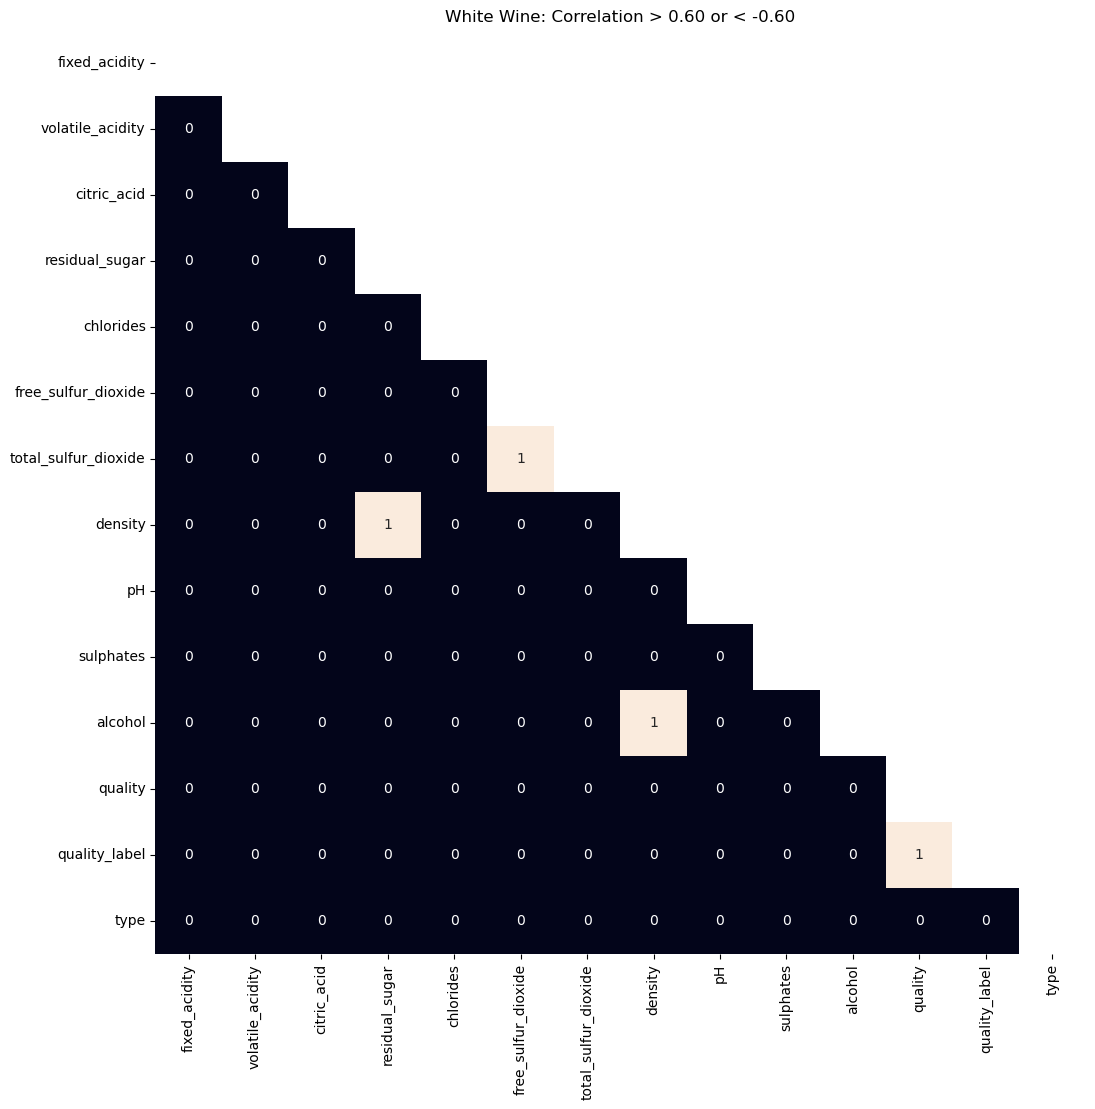

In [25]:
#Heatmap for Correlation > 0.7 or < -0.7
plt.figure(figsize=(12, 12))
mask = np.triu(np.ones_like(white_wine.corr(), dtype=bool))  # Upper triangular mask
correlation_matrix = white_wine.corr()
sns.heatmap((correlation_matrix > 0.6) | (correlation_matrix < -0.6), mask=mask, annot=True, cbar=False, fmt='.0f').set_title('White Wine: Correlation > 0.60 or < -0.60')
plt.show()

### ML Quality Label / no alterations

In [18]:
white_wine_ml_qual = white_wine.drop('quality', axis=1)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Split data into X and Y
X = white_wine_ml_qual.drop('quality_label', axis=1)
y = white_wine_ml_qual['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Logistic Regression model
    LR_model = LogisticRegression(random_state=42, max_iter=10000)
    
    # Fit the model
    LR_model.fit(x_train, y_train)
    
    # Predictions
    preds = LR_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Optional: Print classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

Confusion Matrix:
 [[180 148   0]
 [ 92 524   0]
 [  2  34   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.55      0.60       328
           1       0.74      0.85      0.79       616
           2       0.00      0.00      0.00        36

    accuracy                           0.72       980
   macro avg       0.47      0.47      0.46       980
weighted avg       0.69      0.72      0.70       980



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[168 160   0]
 [ 86 529   1]
 [  0  36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.51      0.58       328
           1       0.73      0.86      0.79       616
           2       0.00      0.00      0.00        36

    accuracy                           0.71       980
   macro avg       0.46      0.46      0.46       980
weighted avg       0.68      0.71      0.69       980

Confusion Matrix:
 [[178 149   1]
 [ 89 527   0]
 [  0  36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.54      0.60       328
           1       0.74      0.86      0.79       616
           2       0.00      0.00      0.00        36

    accuracy                           0.72       980
   macro avg       0.47      0.47      0.46       980
weighted avg       0.69      0.72      0.70       980

Confusion Matrix:
 [[160 168   0]
 [ 81 534   0]
 [  1  35  

c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[153 175   0]
 [ 74 541   0]
 [  1  35   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.47      0.55       328
           1       0.72      0.88      0.79       615
           2       0.00      0.00      0.00        36

    accuracy                           0.71       979
   macro avg       0.46      0.45      0.45       979
weighted avg       0.68      0.71      0.68       979

Mean Accuracy across all folds:  0.7133505659669382


c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Random Forest: K-Fold

In [20]:
white_wine_ml_qual = white_wine.drop('quality', axis=1)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Split data into X and Y
X = white_wine_ml_qual.drop('quality_label', axis=1)
y = white_wine_ml_qual['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(random_state=42)
    
    # Fit the model
    rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Optional: Print classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

Confusion Matrix:
 [[238  90   0]
 [ 66 549   1]
 [  0  23  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       328
           1       0.83      0.89      0.86       616
           2       0.93      0.36      0.52        36

    accuracy                           0.82       980
   macro avg       0.85      0.66      0.71       980
weighted avg       0.82      0.82      0.81       980

Confusion Matrix:
 [[223 105   0]
 [ 69 547   0]
 [  0  18  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       328
           1       0.82      0.89      0.85       616
           2       1.00      0.50      0.67        36

    accuracy                           0.80       980
   macro avg       0.86      0.69      0.75       980
weighted avg       0.81      0.80      0.80       980

Confusion Matrix:
 [[239  89   0]
 [ 59 557   0]
 [  0  21  

### Dropping Highly Correlated Features

In [38]:
#Dropping 'free_sulfur_dioxide' due to correlation with 'total_sulfur_dioxide', keeping 'total...' due to slightly higher correlation with 'quality'
#Dropping 'density' die to correlation with 'alcohol', keeping 'alcohol' due to higher correlation with quality
#all_wine_reduced=all_wine_with_dummies.copy()

white_wine_reduced = white_wine_ml_qual.drop(['free_sulfur_dioxide', 'pH', 'density', 'sulphates'], axis=1)
white_wine_reduced.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
0,7.0,0.27,0.36,20.7,0.045,170.0,8.8,1,0
1,6.3,0.30,0.34,1.6,0.049,132.0,9.5,1,0
2,8.1,0.28,0.40,6.9,0.050,97.0,10.1,1,0
3,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0
4,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0


### Random Forest: K-Fold, dropped columns

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np


from sklearn.ensemble import RandomForestClassifier

# Split data into X and Y
X = white_wine_reduced.drop('quality_label', axis=1)
y = white_wine_reduced['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Random Forest model
    rf_model = RandomForestClassifier(class_weight='balanced')
    
    # Fit the model
    rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Optional: Print classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

Confusion Matrix:
 [[229  99   0]
 [ 59 557   0]
 [  1  23  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.74       328
           1       0.82      0.90      0.86       616
           2       1.00      0.33      0.50        36

    accuracy                           0.81       980
   macro avg       0.87      0.65      0.70       980
weighted avg       0.82      0.81      0.81       980

Confusion Matrix:
 [[216 112   0]
 [ 58 558   0]
 [  0  18  18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.66      0.72       328
           1       0.81      0.91      0.86       616
           2       1.00      0.50      0.67        36

    accuracy                           0.81       980
   macro avg       0.87      0.69      0.75       980
weighted avg       0.81      0.81      0.80       980

Confusion Matrix:
 [[224 104   0]
 [ 57 559   0]
 [  0  21  

### Outlier Removal

In [26]:
#This is based on the boxplot: the features that have strong outliers, but are not correlating much with 'quality' are:

#0,014 Residual Sugar
#0,038 Sulphates
#0,051 Free Sulfur Dioxide
#0,058 pH

#Outliers are only removed for low and medium quality:

white_wine_low = white_wine_reduced[white_wine_ml_qual['quality_label'] == 0]
white_wine_medium = white_wine_reduced[white_wine_ml_qual['quality_label'] == 1]
white_wine_high = white_wine_reduced[white_wine_ml_qual['quality_label'] == 2]

NameError: name 'white_wine_reduced' is not defined

In [41]:
white_wine_low.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
10,8.1,0.27,0.41,1.45,0.033,63.0,12.0,0,0
11,8.6,0.23,0.40,4.20,0.035,109.0,9.7,0,0
12,7.9,0.18,0.37,1.20,0.040,75.0,10.8,0,0
14,8.3,0.42,0.62,19.25,0.040,172.0,9.7,0,0
19,6.5,0.31,0.14,7.50,0.044,133.0,9.5,0,0


In [42]:
white_wine_medium.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
0,7.0,0.27,0.36,20.7,0.045,170.0,8.8,1,0
1,6.3,0.30,0.34,1.6,0.049,132.0,9.5,1,0
2,8.1,0.28,0.40,6.9,0.050,97.0,10.1,1,0
3,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0
4,7.2,0.23,0.32,8.5,0.058,186.0,9.9,1,0


In [43]:
white_wine_high.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
17,6.2,0.66,0.48,1.2,0.029,75.0,12.8,2,0
20,6.2,0.66,0.48,1.2,0.029,75.0,12.8,2,0
22,6.8,0.26,0.42,1.7,0.049,122.0,10.5,2,0
68,6.7,0.23,0.31,2.1,0.046,96.0,10.7,2,0
74,6.7,0.23,0.31,2.1,0.046,96.0,10.7,2,0


In [44]:
def remove_outliers(df, columns):

    # Create a copy of the DataFrame
    df_copy = df.copy()

    for col in columns:
        if col in df_copy.columns:  # Ensure the column exists
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = df_copy[col].quantile(0.25)
            Q3 = df_copy[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Print IQR and bounds for debugging (optional)
            print(f"Column: {col}")
            print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
            print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

            # Filter the DataFrame to exclude outliers
            before_rows = df_copy.shape[0]
            df_copy = df_copy[(df_copy[col] >= lower_bound) & (df_copy[col] <= upper_bound)]
            after_rows = df_copy.shape[0]

            # Print how many rows were removed (optional)
            print(f"Rows before: {before_rows}, Rows after: {after_rows}\n")
        else:
            print(f"Column '{col}' not found in DataFrame.")
    
    return df_copy

In [45]:
white_wine_low = pd.DataFrame(white_wine_low)

# Remove outliers from the specified columns
white_wine_low_cleaned = remove_outliers(white_wine_low, ['residual_sugar', 'sulphates', 'total_sulfur_dioxide', 'pH'])

# Display the original and cleaned DataFrames
print("Original DataFrame:")
print(white_wine_low)
print("\nCleaned DataFrame (with outliers removed):")
print(white_wine_low_cleaned)


Column: residual_sugar
Q1: 1.7, Q3: 11.025, IQR: 9.325000000000001
Lower bound: -12.287500000000001, Upper bound: 25.012500000000003
Rows before: 1640, Rows after: 1640

Column 'sulphates' not found in DataFrame.
Column: total_sulfur_dioxide
Q1: 117.0, Q3: 182.0, IQR: 65.0
Lower bound: 19.5, Upper bound: 279.5
Rows before: 1640, Rows after: 1630

Column 'pH' not found in DataFrame.
Original DataFrame:
      fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
10              8.1              0.27         0.41            1.45      0.033   
11              8.6              0.23         0.40            4.20      0.035   
12              7.9              0.18         0.37            1.20      0.040   
14              8.3              0.42         0.62           19.25      0.040   
19              6.5              0.31         0.14            7.50      0.044   
...             ...               ...          ...             ...        ...   
4882            5.5         

In [46]:
white_wine_low_cleaned.shape

(1630, 9)

In [ ]:
fixed_acidity	volatile_acidity	citric_acid	residual_sugar	chlorides	total_sulfur_dioxide	alcohol	quality_label	type

In [27]:
white_wine_medium = pd.DataFrame(white_wine_medium)

# Remove outliers from the specified columns
white_wine_medium_cleaned = remove_outliers(white_wine_medium, ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'total_sulfur_dioxide'])

# Display the original and cleaned DataFrames
print("Original DataFrame:")
print(white_wine_medium)
print("\nCleaned DataFrame (with outliers removed):")
print(white_wine_medium_cleaned)

NameError: name 'white_wine_medium' is not defined

In [48]:
white_wine_medium_cleaned.shape

(3037, 9)

In [49]:
white_wine_high.shape

(180, 9)

In [50]:
white_wine_cleaned = pd.concat([white_wine_low_cleaned, white_wine_medium_cleaned, white_wine_high], ignore_index=True)

In [51]:
white_wine_cleaned.shape

(4847, 9)

In [52]:
white_wine_cleaned

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,alcohol,quality_label,type
0,8.1,0.270,0.41,1.45,0.033,63.0,12.0,0,0
1,8.6,0.230,0.40,4.20,0.035,109.0,9.7,0,0
2,7.9,0.180,0.37,1.20,0.040,75.0,10.8,0,0
3,8.3,0.420,0.62,19.25,0.040,172.0,9.7,0,0
4,6.5,0.310,0.14,7.50,0.044,133.0,9.5,0,0
...,...,...,...,...,...,...,...,...,...
4842,5.2,0.300,0.34,1.50,0.038,96.0,13.0,2,0
4843,6.4,0.320,0.25,5.00,0.055,138.0,12.4,2,0
4844,4.4,0.320,0.39,4.30,0.030,127.0,12.8,2,0
4845,3.9,0.225,0.40,4.20,0.030,118.0,12.8,2,0


### Random Forest: K-Fold, dropped columns, removed outliers from low/medium

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
import numpy as np
import pandas as pd

# Assuming white_wine_reduced is your DataFrame containing the data

# Split data into X and Y
X = white_wine_cleaned.drop('quality_label', axis=1)
y = white_wine_cleaned['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize the Random Forest model with class weights
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, class_weight='balanced', random_state=42)
    
    # Fit the model
    rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Print confusion matrix and classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]}")

Confusion Matrix:
 [[229  97   0]
 [ 50 557   1]
 [  0  24  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.70      0.76       326
           1       0.82      0.92      0.87       608
           2       0.92      0.33      0.49        36

    accuracy                           0.82       970
   macro avg       0.86      0.65      0.70       970
weighted avg       0.83      0.82      0.82       970

Confusion Matrix:
 [[217 109   0]
 [ 64 543   1]
 [  0  26  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.67      0.71       326
           1       0.80      0.89      0.84       608
           2       0.91      0.28      0.43        36

    accuracy                           0.79       970
   macro avg       0.83      0.61      0.66       970
weighted avg       0.80      0.79      0.79       970

Confusion Matrix:
 [[205 121   0]
 [ 60 546   1]
 [  1  23  

### Hyperparameter Tuning

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import numpy as np
import pandas as pd

# Assuming white_wine_cleaned is your DataFrame containing the data

# Split data into X and Y
X = white_wine_cleaned.drop('quality_label', axis=1)
y = white_wine_cleaned['quality_label']

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced', None]  # Class weights
}

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=skf,
                           scoring='accuracy',  # You can also use other scoring metrics
                           n_jobs=-1,           # Use all available cores
                           verbose=1)           # Verbose output for progress

# Fit the model using GridSearchCV
grid_search.fit(X, y)

# Best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf_model = grid_search.best_estimator_

# Store metrics
accuracy_scores = []

# Evaluate the best model using cross-validation
for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the best model
    best_rf_model.fit(x_train, y_train)
    
    # Predictions
    preds = best_rf_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Print confusion matrix and classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

# Feature Importance
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
 [[233  93   0]
 [ 55 552   1]
 [  0  23  13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       326
           1       0.83      0.91      0.87       608
           2       0.93      0.36      0.52        36

    accuracy                           0.82       970
   macro avg       0.85      0.66      0.71       970
weighted avg       0.82      0.82      0.82       970

Confusion Matrix:
 [[225 101   0]
 [ 69 539   0]
 [  0  26  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       326
           1       0.81      0.89      0.85       608
           2       1.00      0.28      0.43        36

    accuracy               

### Artificial Neural Network (ANN)

In [60]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder

# Assuming white_wine_reduced is your DataFrame containing the data

# Split data into X and Y
X = white_wine_reduced.drop('quality_label', axis=1).values
y = white_wine_reduced['quality_label'].values

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the neural network structure
class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.rand(input_size, hidden_size)
        self.weights_hidden_output = np.random.rand(hidden_size, output_size)
        self.learning_rate = 0.01

    def activation(self, x):
        return 1 / (1 + np.exp(-x))  # Sigmoid activation function

    def activation_derivative(self, x):
        return x * (1 - x)

    def feedforward(self, x):
        self.hidden_layer_input = np.dot(x, self.weights_input_hidden)
        self.hidden_layer_output = self.activation(self.hidden_layer_input)
        self.final_input = np.dot(self.hidden_layer_output, self.weights_hidden_output)
        self.final_output = self.activation(self.final_input)
        return self.final_output

    def backpropagation(self, x, y):
        output_error = y - self.final_output
        output_delta = output_error * self.activation_derivative(self.final_output)

        hidden_layer_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_layer_delta = hidden_layer_error * self.activation_derivative(self.hidden_layer_output)

        # Update weights
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_delta) * self.learning_rate
        self.weights_input_hidden += np.dot(x.T, hidden_layer_delta) * self.learning_rate

    def train(self, x, y, epochs):
        for _ in range(epochs):
            self.feedforward(x)
            self.backpropagation(x, y)

    def predict(self, x):
        output = self.feedforward(x)
        return np.argmax(output, axis=1)

# Store metrics
accuracy_scores = []

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Convert y_train to one-hot encoding for training
    encoder = OneHotEncoder(sparse_output=False)
    y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))
    
    # Create and train the ANN
    ann_model = SimpleANN(input_size=x_train.shape[1], hidden_size=10, output_size=y_train_encoded.shape[1])
    ann_model.train(x_train, y_train_encoded, epochs=1000)  # Number of epochs can be adjusted
    
    # Predictions
    preds = ann_model.predict(x_test)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)

    # Print confusion matrix and classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)


Confusion Matrix:
 [[  0 328   0]
 [  0 616   0]
 [  0  36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.63      1.00      0.77       616
           2       0.00      0.00      0.00        36

    accuracy                           0.63       980
   macro avg       0.21      0.33      0.26       980
weighted avg       0.40      0.63      0.49       980



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[  0 328   0]
 [  0 616   0]
 [  0  36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.63      1.00      0.77       616
           2       0.00      0.00      0.00        36

    accuracy                           0.63       980
   macro avg       0.21      0.33      0.26       980
weighted avg       0.40      0.63      0.49       980



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[  0 328   0]
 [  0 616   0]
 [  0  36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.63      1.00      0.77       616
           2       0.00      0.00      0.00        36

    accuracy                           0.63       980
   macro avg       0.21      0.33      0.26       980
weighted avg       0.40      0.63      0.49       980



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[  0 328   0]
 [  0 615   0]
 [  0  36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.63      1.00      0.77       615
           2       0.00      0.00      0.00        36

    accuracy                           0.63       979
   macro avg       0.21      0.33      0.26       979
weighted avg       0.39      0.63      0.48       979



c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[  0 328   0]
 [  0 615   0]
 [  0  36   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       328
           1       0.63      1.00      0.77       615
           2       0.00      0.00      0.00        36

    accuracy                           0.63       979
   macro avg       0.21      0.33      0.26       979
weighted avg       0.39      0.63      0.48       979

Mean Accuracy across all folds:  0.6284196702174231


c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\janin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming white_wine_cleaned is your DataFrame containing the data
# Split data into X and Y
X = white_wine_reduced.drop('quality_label', axis=1)
y = white_wine_reduced['quality_label']

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store metrics
accuracy_scores = []

# Initialize StandardScaler
scaler = StandardScaler()

for train_index, test_index in skf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Scale the features
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    
    # Initialize the SVM model
    svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)
    
    # Fit the model
    svm_model.fit(x_train_scaled, y_train)
    
    # Predictions
    preds = svm_model.predict(x_test_scaled)
    
    # Evaluate the model
    acc = accuracy_score(y_test, preds)
    accuracy_scores.append(acc)
    
    # Print confusion matrix and classification report for each fold
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

# Calculate and print the average accuracy across all folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Accuracy across all folds: ", mean_accuracy)

# Feature Importance for SVM
# Note: SVM doesn't have built-in feature importance like Random Forest
# We'll use the absolute values of the coefficients for linear SVM
# For non-linear kernels, consider using permutation importance or SHAP values

if svm_model.kernel == 'linear':
    importances = np.abs(svm_model.coef_[0])
    indices = np.argsort(importances)[::-1]

    print("Feature ranking (based on absolute values of coefficients):")
    for f in range(X.shape[1]):
        print(f"{f + 1}. Feature {X.columns[indices[f]]}: {importances[indices[f]]}")
else:
    print("Feature importance is not directly available for non-linear SVM kernels.")
    print("Consider using permutation importance or SHAP values for feature importance.")


NameError: name 'white_wine_reduced' is not defined